In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [145]:
# Reading the data into a dataframe
path_to_files = "/Users/rbu/Documents/Personal Documentation/Online_Courses/ml-demo/datasets/supervised/car_data/car_prices.csv"
print(path_to_files)
df = pd.read_csv(path_to_files)

df_copy = df

/Users/rbu/Documents/Personal Documentation/Online_Courses/ml-demo/datasets/supervised/car_data/car_prices.csv


In [146]:
# Basic overview of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [147]:
# Checking for nulls
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [148]:
# Basic overview
print(df.head(5))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [149]:
# Inspecting specific cars and their models + cleaning
print(df['CarName'].sample(10))

123        plymouth valiant
80     mitsubishi mirage g4
72            buick skylark
105            nissan kicks
55                mazda 626
196             volvo 244dl
77        mitsubishi lancer
17                   bmw x3
174        toyota celica gt
1       alfa-romero stelvio
Name: CarName, dtype: object


In [150]:
df['model'] = [x.split()[0] for x in df['CarName']]
df['model'] = df['model'].replace({'maxda': 'Mazda', 'mazda': 'Mazda',
                                       'nissan': 'Nissan',
                                       'porcshce': 'Porsche', 'porsche': 'Porsche',
                                       'toyouta': 'Toyota', 'toyota': 'Toyota',
                                       'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen': 'Volkswagen'})
df = df.drop(['car_ID', 'CarName'], axis=1)

In [151]:
print(df['model'].sample(10))

91         Nissan
16            bmw
200         volvo
55          Mazda
105        Nissan
79     mitsubishi
58          Mazda
40          honda
28          dodge
85     mitsubishi
Name: model, dtype: object


In [152]:
numerical_vars = df.drop(['price'], axis=1).select_dtypes('number').columns
categorical_vars = df.select_dtypes('object').columns

/var/folders/rn/9n68dmx944s40xtf_9mjdcsw0000gn/T/ipykernel_5894/2359269304.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(column=numerical_vars, bins=50, layout=(4, 4), ax=ax)


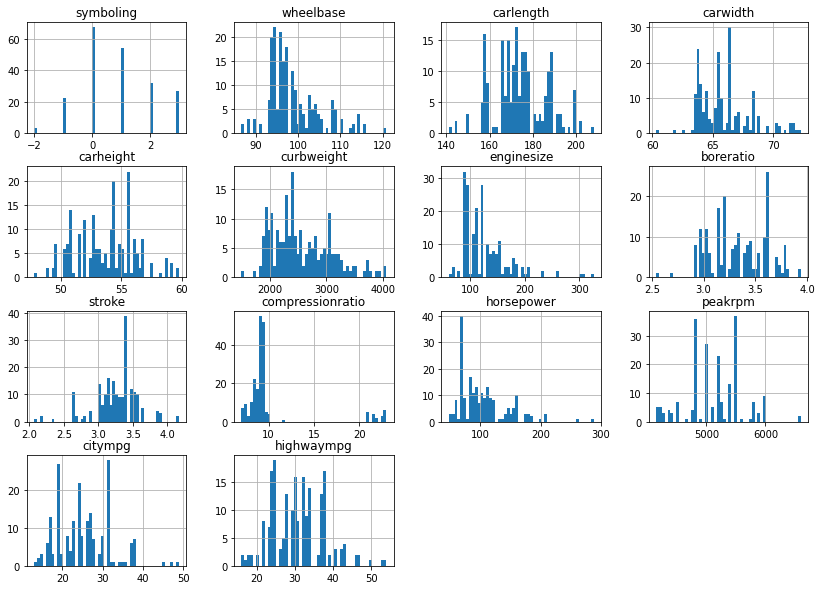

In [153]:
# Investigate data distribution:
fig, ax = plt.subplots(figsize=(14, 10))
df.hist(column=numerical_vars, bins=50, layout=(4, 4), ax=ax)
plt.show()

"""Plots show uneven distributions for each of the variables, possible normalisation or scaling could assist in model creation."""

In [154]:
print("The target variable PRICE stats:\n")
print(df['price'].describe())

The target variable PRICE stats:

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [155]:
print("The numerical features stats:\n")
print(df[numerical_vars].describe())

The numerical features stats:

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000 

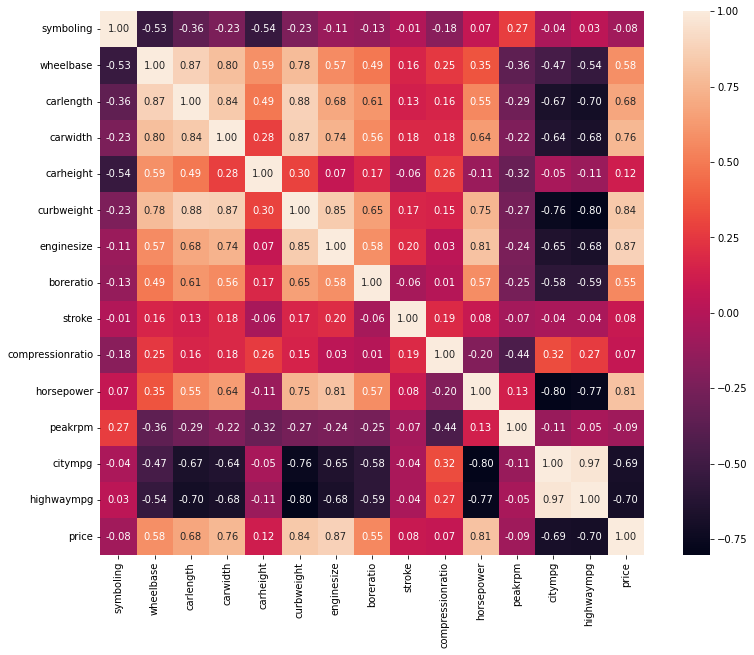

In [156]:
map_columns = df_copy.drop(['car_ID', 'CarName'], axis=1).select_dtypes('number').columns
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_copy[map_columns].corr(), square=True, xticklabels=True, yticklabels=True, fmt='.2f', annot=True, ax=ax)
plt.show()

In [157]:
# Perforiming Linear Regression:

df_model = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

print("All columns with dummies added: \n", df_model.head())

All columns with dummies added: 
    symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  model_isuzu  \
0         130       3.47    2.68               9.0  ...            0   
1         130       3.47    2.68               9.0  ...            0   
2         152       2.68    3.47               9.0  ...            0   
3         109       3.19    3.40              10.0  ...            0   
4         136       3.19    3.40               8.0  ...            0   

   model_jaguar  model_mercury  model_mitsubishi  model_peugeot  \
0             0              0         

In [158]:
# Creating our pipeline:
estimator = make_pipeline(Normalizer(), LinearRegression())

X = df_model.drop('price', axis=1)
y = df_model['price']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=52)

estimator.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('linearregression', LinearRegression())])

In [160]:
y_pred = estimator.predict(X_test)

print(f'model : {estimator} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : Pipeline(steps=[('normalizer', Normalizer()),
                ('linearregression', LinearRegression())]) and  rmse score is : 1883.8399174429162, r2 score is 0.9022736256740516
